# Building NLP Applications with Hugging Face

In this project, we will delve into the fascinating world of Natural Language Processing (NLP) using the powerful tools provided by Hugging Face. Our journey will cover a range of common NLP tasks, including:

- **Sentiment Analysis**: Categorizing text as negative, positive, or neutral to understand the sentiment behind user reviews.
- **Text Embedding**: Transforming text into numerical, n-dimensional vector representations, which are essential for various downstream tasks.
- **Semantic Search**: Matching a query with the most appropriate result based on embeddings, enabling more intuitive and accurate search functionalities.
- **And More**: Exploring additional NLP tasks and techniques as we progress.

## Dataset Overview

The dataset we will be using comes from "Rent the Runway" and can be accessed [here](https://cseweb.ucsd.edu//~jmcauley/datasets.html#clothing_fit). It comprises user reviews on clothing items, their ratings on fit, and other metadata about the user (e.g., gender, height, size, age, reason for renting) and the item (e.g., category). This dataset offers a rich mixture of data types, with a significant focus on textual data, making it ideal for our NLP experiments.

## Project Workflow

### 1. Data Preprocessing
We will start by cleaning and preprocessing the text data to ensure it is in a suitable format for analysis. This includes tasks such as removing special characters, handling missing values, and normalizing text.

### 2. Sentiment Analysis
Using Hugging Face's pre-trained models, we will perform sentiment analysis on the user reviews. This will involve categorizing each review as positive, negative, or neutral and assigning a sentiment score.

### 3. Text Embedding
We will transform the cleaned text into embeddings using state-of-the-art transformer models. These embeddings will serve as the foundation for various NLP tasks, including semantic search and clustering.

### 4. Semantic Search
Leveraging the embeddings, we will implement a semantic search functionality that matches user queries with the most relevant reviews. This will demonstrate the power of embeddings in understanding the context and meaning of text.

### 5. Visualization and Analysis
Finally, we will visualize the results of our analyses, such as sentiment trends over time and the distribution of sentiment scores. This will help us gain deeper insights into the data and the effectiveness of our NLP models.

## Tools and Libraries

Throughout this project, we will be using the following tools and libraries:

- **Hugging Face Transformers**: For accessing pre-trained models and performing various NLP tasks.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib/Seaborn**: For data visualization.
- **Scikit-learn**: For additional machine learning tasks and evaluation, particularly the TSNE function.

## Getting Started

Most importantly, we bring our curiosity and enthusiasm for NLP workflows, especially those involving Hugging Face transformers. Let's embark on this exciting journey together!

## Setup

For this project, we will need several Python packages:

- `pandas`: A powerful data manipulation and analysis library that provides data structures like DataFrames to handle and analyze structured data efficiently.
- `numpy`: A fundamental package for scientific computing with Python, providing support for arrays, matrices, and a collection of mathematical functions to operate on these data structures.
- `datetime`: A module that supplies classes for manipulating dates and times, essential for handling time-series data and date-related operations.
- `re`: The regular expression library in Python, used for string searching, matching, and manipulation, which is crucial for text preprocessing tasks.
- `string`: A module that provides a collection of string operations and constants, useful for various text processing tasks.
- `matplotlib.pyplot`: A plotting library used for creating static, animated, and interactive visualizations in Python. It is particularly useful for generating plots and charts to visualize data.
- `seaborn`: A statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- `transformers`: A library by Hugging Face that provides general-purpose architectures for natural language understanding and generation. It includes pre-trained models for various NLP tasks.
- `sentence_transformers`: A library that extends `transformers` by providing easy-to-use methods to compute dense vector representations for sentences and paragraphs, useful for tasks like semantic search and clustering.

These packages will help us with the data preprocessing steps, visualization, and, of course, NLP tasks using Hugging Face (i.e. `transformers` and `sentence_transformers`).

Import the following packages.

- Import `re`, `datetime`, and `string`.
- Import `pandas` using the alias `pd`.
- Import `numpy` using the alias `np`.
- Import `matplotlib.pyplot` using the alias `plt`.
- From the `transformers` package, import `pipeline`.
- From the `sentence_transformers` package, import `SentenceTransformer`.
- From the `sentence_transformers.util` package, import `semantic_search`. 
- From the `IPython.display` package, import `display` and `Markdown`.

In [53]:
# packages and modules.
import pandas as pd
import datetime
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import semantic_search


# import display and Markdown
from IPython.display import display, Markdown

## Import the Runway Data

The runway data is contained in a CSV file named `runway.csv`, wich contains the following columns.

- `user_id`: the unique identifier for the user.
- `item_id`: the unique identifier for the item/product rented.
- `rating`: the rating by the user.
- `rented_for`: the reason the item was rented.
- `review_text`: the actual text for the submitted user review.
- `category`: the category of the item rented.
- `height`: the height of the user in the format {feet}'{inches}".
- `size`: the size of the item rented by the user.
- `age`: the age of the user.
- `review_date`: the date the review was made by the user.

### Import the runway data to a pandas dataframe.

- Read the data from `runway.csv`, making sure to parse the date column. |Assign to `runway`.
- Print the column info

In [54]:
runway = pd.read_csv("runway.csv", parse_dates=['review_date'])

print(runway.info())
runway

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      1506 non-null   int64         
 1   item_id      1506 non-null   int64         
 2   rating       1506 non-null   int64         
 3   rented for   1506 non-null   object        
 4   review_text  1506 non-null   object        
 5   category     1506 non-null   object        
 6   height       1503 non-null   object        
 7   size         1506 non-null   int64         
 8   age          1500 non-null   float64       
 9   review_date  1506 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 117.8+ KB
None


,user_id,item_id,rating,rented for,review_text,category,height,size,age,review_date
0,476109,139086,8,formal affair,it hit the floor perfectly with a pair of heels and hit my curvy figure at all the right places,gown,"5' 3""",15,27.0,2017-12-19
1,203660,1126889,6,party,the dress is absolutely gorgeous unfortunately the dress proportions were off for my height i would have loved to wear this out but i couldnt because the lengths were awkward on my body,dress,"5' 4""",12,28.0,2022-01-03
2,868581,652189,8,wedding,even though it was lined with satin this was a light beachy dress that was still formal enough for this casual beach weddingitsbackless though so you cant wear a bra and because the neck is such a scoopneck it makes the neckline a little strange if you have a chest and dont wear onei ended up getting one of those stick on bras and the dress looked much betterits much pinker than the model picture which was a pleasant surprisepretty dress comfortable just a little awkward fitting in the chest area if you have anything larger than an abuy the stick on bra,dress,"5' 5""",24,30.0,2021-08-05
3,935076,1879504,8,wedding,this dress was greatit fit really well and was very comfortablethe only negative is that the length is a little odd so it made walking up stairs and getting into the car a little difficultimlbs and the medium fit perfectly,sheath,"5' 3""",14,37.0,2021-10-02
4,995023,1179146,10,party,super flattering i am usually a sizemi have a dd chest and this dress was so flattering on,dress,"5' 2""",14,37.0,2022-11-20
...,...,...,...,...,...,...,...,...,...,...
1501,832517,640839,10,wedding,i loved this dress it was so beautiful and received complements throughout the night i ordered awith aas my backup size and went with thethewas a little snug around my bottom half but thewas a bit loose at the top i could have gone with either i just preferred to have the top fitted so that the layer under the lace wouldnt dip too low i ended up wearing a strapless bra with this the back is high enough that its covered but i also probably could have gone without one the dress was definitely longer on me that it is on the model but the picture i included makes it look an inch or two longer than it actually wasas an aside about rtr i had scheduled the dress to arrive the day before i had to fly out for the wedding but the ups center lost power and the dress hadnt come before i had to leave i called rtr in a panic and they had the dress in both the original and backup sizes overnighted to my hotel for no extra charge they didnt have the earrings i had ordered so they sent me an upgraded pair on top of all of this the person i spoke with at rtr was so incredibly kind and made everything really easy id recommend this dress and rtr to anyone,dress,"5' 5""",1,31.0,2022-04-30
1502,64179,154002,8,formal affair,this dress was perfect i couldnt have loved it more it was definitely a knock out and i received compliments all night,gown,"5' 5""",8,34.0,2018-06-12
1503,235056,1112658,8,wedding,this dress fits like a glove and the fabric is thick enough that it doenst show bumps etci thought it was super flattering and really comfortable it is a great way stand out in a sea of black dresses i paired it with black wedges and a creme pashmina for an outdoor late summer wedding,dress,"5' 4""",8,31.0,2020-09-18
1504,866301,985087,10,formal affair,i wore this dress for prom i absolutely loved it it was actually my backup dress and the only size available was anwhich i am butis better for some dresses not all at first the zipper would stop around the waist area but i got it eventually it fit me like a glove i received so many compliments and i really stood out the slits added a nice touch the only downfalls was that it was a little too long i am heals made it a little better the slip underneath wasnt really a problem i had to pull it down once or twice i was not able to wear underwear with it and i wore a backless bra it was an awesome dress that was very fitt

## Preprocessing `review_text` data

Most unstructured text, such as reviews for products, are messy. They contain special characters which may not be necessary, extra spaces, irrelevant digits, and more. Therefore, it is common practice to process, or clean, the text before performing NLP tasks on it.

We will create several processing steps for the `review_text` strings.

### Create several steps that will preprocess the text for the following areas:

- replace the special character "/" with a space;
- remove punctuations;
- remove digits;
- replace runs of whitespace, i.e. more than one in a row, with no space; and
- make lowercase.

Apply these changes to the `review_text` column in the `runway` dataset. 

Save as `review_text_cleaned`.

In [55]:
# Display the full value for each row in the 'review_text' column
pd.set_option('display.max_colwidth', None)
print(runway['review_text'][:15])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     it hit the floor perfectly with a pair of heels and hit my curvy figure at all the right places
1                                                                                                                                                                                                                                                                                                                                                                                          the dress is absolutely gorgeous unfortunately the dres

In [56]:
# Remove the forward-slash character
runway['review_text_cleaned'] = runway['review_text'].str.replace(r"\/","")

# Remove bad punctuation
runway['review_text_cleaned'] = runway['review_text_cleaned'].str.translate(string.punctuation)

# Remove digits
runway['review_text_cleaned'] = runway['review_text_cleaned'].str.replace(r"\d+","")

# Remove running spaces
runway['review_text_cleaned'] = runway['review_text_cleaned'].str.replace(r"\s{2,}","")

# Make the text lowercase
runway['review_text_cleaned'] = runway['review_text_cleaned'].str.lower()

In [57]:
print("Take a lookf of the Review Text column to inspect it again after clean:\n")
print(runway['review_text_cleaned'][:15])

Take a lookf of the Review Text column to inspect it again after clean:

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     it hit the floor perfectly with a pair of heels and hit my curvy figure at all the right places
1                                                                                                                                                                                                                                                                                                                                                                        

## Sentiment Analysis on `review_text_cleaned`

Fantastic! The review text has been successfully cleaned of extraneous characters, making it ready for further Natural Language Processing (NLP) tasks.

The first NLP task we will undertake is sentiment analysis, which involves categorizing text into sentiment buckets such as negative, positive, or sometimes neutral. Sentiment analysis is a valuable tool in business settings as it helps decision-makers understand trends in product or service perception, customer experience, reviews, and more. It can also serve as a foundation for more in-depth analysis.

For this task, we will utilize the `pipeline()` function from the Hugging Face library, specifically with the ["distilbert-base-uncased-finetuned-sst-2-english"](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) model. This model is a smaller, general-purpose language representation model that excels at text classification tasks, including sentiment analysis.

### The `pipeline()` function can help as achieve this.

- Instantiate a new pipeline object for `sentiment-analysis`. Save as `sentimentAnalysis`.
- Use this with a list of the cleaned review text as the input to return sentiment for each review. Save the output as `sent_analysis_output`.

In [58]:
model = "distilbert-base-uncased-finetuned-sst-2-english"

# Instantiate the new pipeline() object for sentiment analysis. Include the model defined above as the model input.
sentimentAnalysis = pipeline(task = "sentiment-analysis", model = model)

# Run sentiment analysis on the cleaned review text.
sent_analysis_output = sentimentAnalysis(list(runway["review_text_cleaned"]))

In [59]:
# Create a new DataFrame called "sentiment_df" with the required columns
sentiment_df = pd.DataFrame({
    "Review Rext": runway["review_text_cleaned"],
    "Sentiment": [result['label'] for result in sent_analysis_output],
    "Score": [result['score'] for result in sent_analysis_output]
})

# Display the first 20 rows of the new DataFrame
sentiment_df.head(20)

,Review Rext,Sentiment,Score
0,it hit the floor perfectly with a pair of heels and hit my curvy figure at all the right places,POSITIVE,0.999809
1,the dress is absolutely gorgeous unfortunately the dress proportions were off for my height i would have loved to wear this out but i couldnt because the lengths were awkward on my body,NEGATIVE,0.950723
2,even though it was lined with satin this was a light beachy dress that was still formal enough for this casual beach weddingitsbackless though so you cant wear a bra and because the neck is such a scoopneck it makes the neckline a little strange if you have a chest and dont wear onei ended up getting one of those stick on bras and the dress looked much betterits much pinker than the model picture which was a pleasant surprisepretty dress comfortable just a little awkward fitting in the chest area if you have anything larger than an abuy the stick on bra,NEGATIVE,0.987216
3,this dress was greatit fit really well and was very comfortablethe only negative is that the length is a little odd so it made walking up stairs and getting into the car a little difficultimlbs and the medium fit perfectly,POSITIVE,0.996077
4,super flattering i am usually a sizemi have a dd chest and this dress was so flattering on,NEGATIVE,0.966725
5,thefit better in the chest but it was too loose in the waist but thefit perfectly in the waist,POSITIVE,0.988300
6,i had some problems with the zipper even on the hanger it was very tricky to zip up i had plenty of room for the fabric to close on my body and it was extremely difficult to zip up on the body and on the hanger i also thought it was a touch long i amand hadinch heels on and ordered a regular it was a little long and i needed to lift it some when tackling stairs other than that i loved the dress i dont normally wear strapless much but the sweetheart cut works great,POSITIVE,0.790131
7,the dress was gorgeous but unfortunately i was unable to wear it due to some quality issues which the renttherunway team was excellent at handlingi would recommend going upsizes from your usual dress size if you have a larger bustit also runs on the long side imand even withinch heels it dragged a little too much for my preferencethe colours are rich and true to the picture the fabric is forgiving when it comes to wrinkles so its a dress that travels very well,POSITIVE,0.987772
8,i wore this dress for an attorney mixer it definitely stood out in a sea of black suits i paired this dress with a classic black blazera belt,POSITIVE,0.996769
9,the fit of this dress runs small imlbs and typically wear a sizei ordered aand thewasnt even close to being able to zip up ended up wearing theand it was still snug i would recommend sizing up with this dress cut and color are beautiful and classy fabric is thick and hides your flaws would love to buy this dress,POSITIVE,0.996069


## Histogram Plot of Sentiment Score

## Exploring Hugging Face Models and Pipelines

Hugging Face offers a vast array of models that can be utilized for various NLP tasks. While the sentiment analysis pipeline above used a default model, we can choose any model from the [Hugging Face model hub](https://huggingface.co/models) to better suit our data. For instance, [FashionClip](https://huggingface.co/patrickjohncyh/fashion-clip) is a model specifically trained for fashion-related datasets and tasks, making it a great fit for this dataset.

The [`pipeline()` module](https://huggingface.co/docs/transformers/main_classes/pipelines#pipelines) in Hugging Face is highly versatile. It supports multiple transformer pipelines across different domains, including NLP, computer vision, audio, and multi-modal tasks. Within NLP alone, it covers 12 different tasks such as sentiment analysis (listed as "Text Classification"), Named Entity Recognition, Summarization, Conversations, and Q&A.

By leveraging the appropriate model and pipeline, we can enhance the performance and relevance of our analysis, ensuring that the tools we use are tailored to the specific characteristics of our dataset.

Now, we're going to understand the distribution of the sentiment of review texts via a histogram. This will give us an overall understanding of the reviews specifically how customers viewed their rented items.

- Parse the output of `sent_analysis_output` into two new columns - `clean_sentiment_category` and `clean_sentiment_score`.
- Use `seaborn` and the new sentiment score column to create a histogram. Set the number of bins to 20.
- Add a title, "Distribution of Sentiment Score", subtitle - "For Clean Review Text" - and x and y labels.

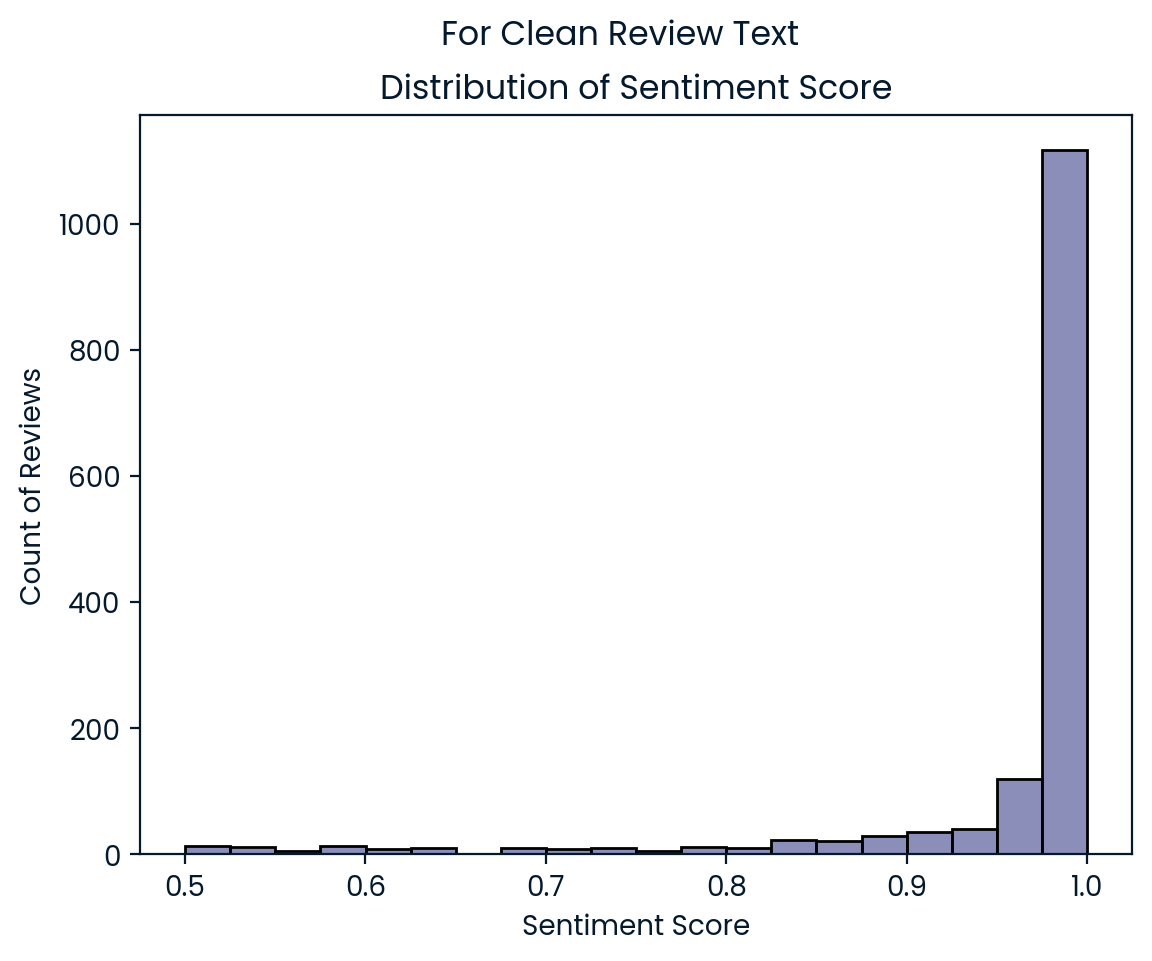

In [60]:
runway['clean_sentiment_category'] = [l["label"] for l in sent_analysis_output]
runway['clean_sentiment_score'] = [s["score"] for s in sent_analysis_output]

sns.histplot(data=runway, x="clean_sentiment_score", bins=20)
plt.suptitle("For Clean Review Text")
plt.xlabel("Sentiment Score")
plt.ylabel("Count of Reviews")
plt.title("Distribution of Sentiment Score")
plt.show()

## Sentiment Over the Years

The distribution is informative from a global perspective - i.e., the reviews skew positive ("great customer experience"). However, it doesn't tell a complete story.

Now that we have sentiment, we can explore the trends of sentiment across different facets of the data (i.e. over time, between products, etc.). Dissecting the data in this way, based on the business questions of interest, will explain more about what is going well and what needs improvement.

### In this step, we 'll explore how sentiment changed over the years through a bar plot visualization.

- Create a new column called `year`.
- Count the number of reviews by `year` and `clean_sentiment_category`. Save as `chart_data`.
- Visualize the count of reviews using a seaborn `.barplot()`.
- Add an appropriate title and axes labels.

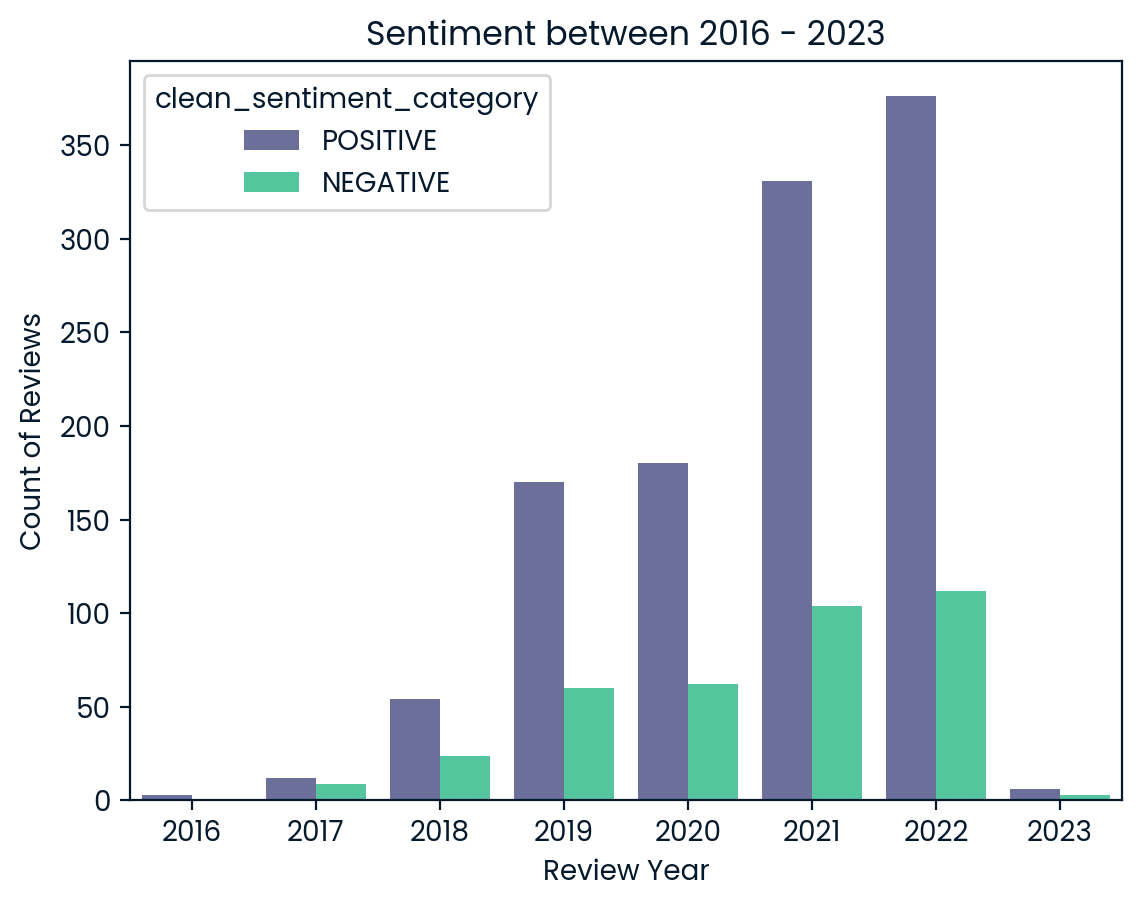

In [61]:
runway['year'] = runway['review_date'].dt.year

chart_data = runway.groupby(['year', 'clean_sentiment_category'], as_index=False)['user_id'].count()
chart_data.columns = ['year', 'clean_sentiment_category', 'cnt']

sns.barplot(data=chart_data, x="year", y="cnt", hue="clean_sentiment_category", errorbar = None)
plt.title("Sentiment between 2016 - 2023")
plt.xlabel("Review Year")
plt.ylabel("Count of Reviews")
plt.show()

## Does Cleaning Text Matter?

Wow - that's quite a set of positive reviews! It seems like the amount of positive reviews increased dramatically in 2021. Potentially a revamp of the customer experience, product quality, more customers, or something else we don't have data for. 

From a business context, digging into the common words/n-grams of the positive reviews can be revealing as to what customers love about the products. Doing the same for the negative reviews can be just as informative for what they don't love (i.e. sizing issues, rental service, etc.). 

We will look into that soon. But first, let's test the previous comment on preprocessing text. Does it matter for sentiment analysis?

In this step , we will build another sentiment analysis pipeline but, in this case, for the non-cleaned `review_text`. Then, we will compare the output from the two pipelines to understand if the cleaning made a difference in categorizing sentiment.

### Instructions

- Duplicate the steps from the previous exercise to run a sentiment analysis pipeline. Save as `sent_analysis_2`.
- Parse the output and save as `sentiment_category` and `sentiment_score`.
- Create a confusion matrix using `pd.crosstab()` comparing the output of `clean_sentiment_category` and `sentiment_category`.

Note that this task is computationally intensive and may take several minutes to run. It runs faster in Premium Workspace.

In [62]:
sent_analysis_2 = sentimentAnalysis(list(runway["review_text"]))

runway['sentiment_category'] = [s["label"] for s in sent_analysis_2]
runway['sentiment_score'] = [s["score"] for s in sent_analysis_2]


display(pd.crosstab(runway['clean_sentiment_category'], runway['sentiment_category']))

sentiment_category,NEGATIVE,POSITIVE
clean_sentiment_category,,
NEGATIVE,373,1
POSITIVE,2,1130


### Analysis of Sentiment Results

Based on the previous results, the sentiment of the review was quite consistent with the cleaned text. This is a positive outcome for us! It indicates that we can use the original text for further analysis without significant loss of accuracy. However, it's important to remember that this is situation-dependent. Always weigh the benefits of cleaning text versus leaving it as is.

### Understanding Transformers in NLP

Transformers, such as those available on Hugging Face, are a crucial component of machine learning and deep learning models designed to process sequential data. They utilize a mechanism known as "self-attention" to understand a specific token (word) by considering other tokens (words) in the sequence (sentence).

In simpler terms, transformers—especially those trained on very large datasets—perform well on unstructured, un-cleaned text because they take the entire sentence into context. Each word contributes to the overall understanding of the sentence. For a deeper dive into this concept, refer to the [BERT paper](https://arxiv.org/pdf/1904.07531.pdf), which elaborates on this point.

### Benefits of Using Transformers

1. **Time-Savings**: Transformers can significantly reduce the time required for data preparation. This allows for quicker analysis and decision-making.
2. **Leveraging Unstructured Text**: With less hassle in data preparation, more unstructured text can be utilized, enhancing the robustness of the analysis.

## Embeddings

In the next task, we will switch gears to exploring another common use case for Hugging Face and transformers - **text embeddings**.

Embeddings, in a very simplistic definition, are vector (numerical) representations of data within n-dimensions. In this context, we are focusing on text embeddings. Each transformer model may produce embeddings with a different number of dimensions. Embeddings are powerful because they translate human language into a format that computers can process, enabling advanced functionalities such as similarity detection, text generation, semantic search, and more. These capabilities are extremely valuable for various business applications, including recommendation systems and search functionalities within websites or product catalogs.

We will now apply this concept to the `rented for` column using the `sentence_transformer` [package](https://huggingface.co/sentence-transformers). Specifically, we will utilize the BERT-based ["all-MiniLM-L6-v2" model](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2), which is designed to map sentences and paragraphs to n-dimensional vectors. This model is well-suited for generating embeddings that can be used in a variety of downstream tasks.

### Instructions

- Instantiate a new instance of `SentenceTransformer` using the specified model here: "sentence-transformers/all-MiniLM-L6-v2".
- Generate an embedding for each review text using `model.encode()`. Save as `embeddings`.
- Print the shape of the new embeddings array.

In [63]:
model_id = "sentence-transformers/all-MiniLM-L6-v2"

model = SentenceTransformer(model_id)

embeddings = model.encode(runway['rented for'])

print(embeddings.shape)

(1506, 384)


In [64]:
print("The Shape embeddings results was: (1506, 384)")

The Shape embeddings results was: (1506, 384)


## Clustering

The `all-MiniLM-L6-v2` model generates embeddings with 384 dimensions. While higher-dimensional embeddings can capture intricate relationships between words, they can pose challenges for certain tasks, such as clustering. This is due to the "Curse of Dimensionality," which can degrade the performance of clustering algorithms in high-dimensional spaces—a common issue in text mining and NLP.

To address this, dimensionality reduction techniques are often employed. These techniques help in calculating distances (e.g., Euclidean) between embeddings more effectively, which in turn facilitates better clustering.

Transformers are designed to excel at learning context, meaning that similar texts—whether they are words, sentences, or documents—will have similar vectors and thus be closer together in the embedding space. This proximity can be leveraged to identify which products, users, reviews, etc., are similar to each other.

Understanding these relationships is a crucial step in building recommendation systems, as it allows for the identification of similar items or users, thereby enhancing the recommendation process.

### Now we 'll conduct dimensionality reduction using the `TSNE` module from the `sklearn` package.

- Import `TSNE` from `sklearn.manifold`.
- Create a new TSNE object using the defined input parameters. Save as `tsne`.
- Fit the `tsne` model with the saved embeddings. Save this as `tsne_dims`.

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)

tsne_dims = tsne.fit_transform(embeddings)

## Visualizing the Clusters

Now each embedding is 2-dimensional. We don't need to be so drastic in dimensionality reduction for clustering, i.e. use explained variance ratio to determine the right number of components, but is important for visualizing the clusters.

With these smaller vectors, let's move on to generating basic clusters (the average of each category) and building a visualization for them!

- Extract the x and y dimensions from the `tsne_dims` result. Save as new columns in `runway` named `x` and `y`, respectively.
- Use `seaborn.scatterplot` to create a new scatterplot using the x and y dimensions and `category` as the "hue".
- Set the title as `Embeddings visualized for 'rented for' reasons and category using t-SNE`.

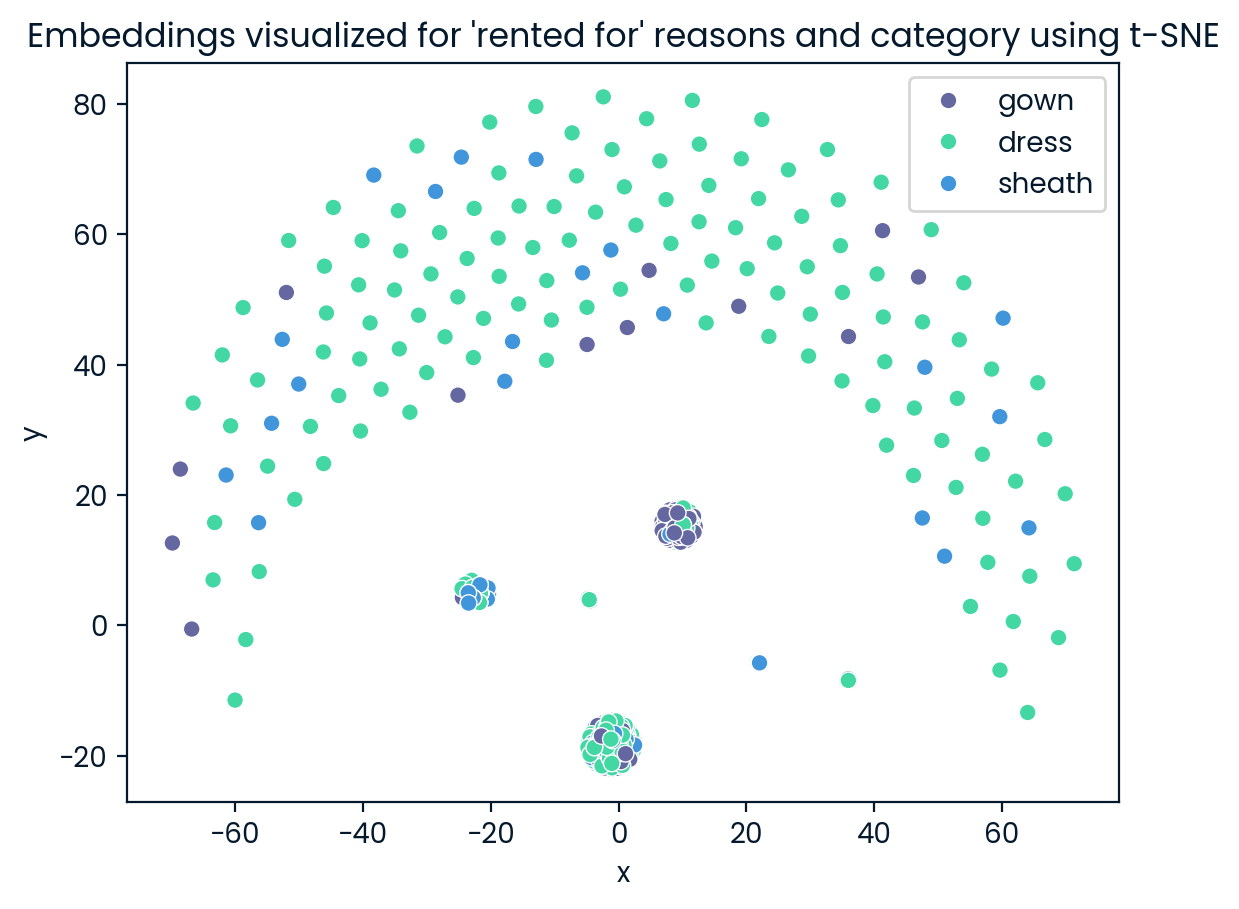

In [66]:
# Parse out the x and y dimensions from the tsne output.
runway['x'] = [x for x,y in tsne_dims]
runway['y'] = [y for x,y in tsne_dims]

# Create the scatterplot
sns.scatterplot(x = "x", y = "y", hue = "category", data = runway)
plt.legend()
plt.title("Embeddings visualized for 'rented for' reasons and category using t-SNE")
plt.show()

## Semantic Search

The plot is visualizing all of the review embeddings based on the "rented_for" column in a two-dimensional space. This reduction from the original high-dimensional space (e.g., 384 dimensions) to just two dimensions is necessary for human interpretation. The color coding in the plot indicates the type of item rented, such as "dress", "gown", or "sheath".

From the visualization, we can observe two main clusters in the dataset for the "rented for" column. One cluster is predominantly blue, representing gowns, while the other is mainly orange, representing dresses. This clustering provides insights into how customers rent items for different types of occasions. For instance, gowns might be rented more frequently for formal events, while dresses might be chosen for semi-formal or casual occasions.

This example, though simple, is quite informative. It demonstrates how embeddings can reveal patterns in customer behavior and preferences. Beyond visualization, embeddings are crucial for facilitating "semantic search". Semantic search involves searching with meaning and context, aiming to understand the user's intent and find the most relevant results. This contrasts with "lexical search", where the search engine looks for exact matches of the query or its defined variants. Both search methods have their strengths and weaknesses, and further research into their applications is encouraged.

In a customer experience setting, semantic search can be incredibly powerful. It can enhance recommendations by identifying products similar to those described in reviews or product descriptions. Additionally, it can improve search functionality by finding products that match the meaning of the phrases or words in user queries. This capability makes semantic search a valuable tool for improving customer satisfaction and engagement.

### Now we will build a simple semantic search pipeline using the `sentence-transformer` package.

- First, generate an embedding of the pre-defined query using the same model object saved above. Save this query embedding as `query_emb`.
- With the `semantic_search()` function, use the query embedding and the other embeddings to get the top three "hits", i.e. most similar items by review.
- Use a for-loop to print the category and rented for reason for each hit.

In [67]:
query = "a gorgeous and flattering dress"

query_emb = model.encode(query, convert_to_tensor=True)

hits = semantic_search(query_emb, embeddings, top_k=3)

for hit in hits[0]:
    idx = hit['corpus_id']
    print(
        "ITEM ID: ", runway.iloc[idx]['item_id'], 
        "; RENTED FOR: ", runway.iloc[idx]['rented for'],
        "; REVIEW", runway.iloc[idx]['review_text'])

ITEM ID:  1498329 ; RENTED FOR:  wedding ; REVIEW the dress was gorgeous but unfortunately i was unable to wear it due to some quality issues which the renttherunway team was excellent at handlingi would recommend going upsizes from your usual dress size if you have a larger bustit also runs on the long side imand even withinch heels it dragged a little too much for my preferencethe colours are rich and true to the picture the fabric is forgiving when it comes to wrinkles so its a dress that travels very well
ITEM ID:  1879504 ; RENTED FOR:  wedding ; REVIEW this dress was greatit fit really well and was very comfortablethe only negative is that the length is a little odd so it made walking up stairs and getting into the car a little difficultimlbs and the medium fit perfectly
ITEM ID:  652189 ; RENTED FOR:  wedding ; REVIEW even though it was lined with satin this was a light beachy dress that was still formal enough for this casual beach weddingitsbackless though so you cant wear a b

## Generate New Content for Marketing 

The semantic search returned three different items that appear to be similar to what we were searching for, i.e. "the dress was gorgeous" and "this dress was a great fit". With some fine-tuning, we can achieve even greater performance. We can also notice some constructive feedback on other parts of the dress. Further investigation here would reveal important insights for the business team.

Let's again switch gears for this final task. Let's generate some new text based on a prompt. Specifically, we want to create some brainstorming material for a new marketing campaign. This type of process can save a lot of time in the creation process - helping we start at "I have a good idea" vs. "I need an idea". 

### In this step , we can switch back to the `pipeline()` module.

- Instantiate a text generation pipeline using `model = "gpt2"` as the input parameter. Save as `generator`.
- Using this generator, create 1 new piece of text based on the pre-defined prompt. Save as `output`.
- Print the prompt and the output.

In [68]:
from transformers import pipeline

generator = pipeline(model="gpt2")

prompt = "Introducing our latest winter collection: a stunning dress that combines elegance and comfort. Perfect for any occasion, this dress"

output = generator(prompt, num_return_sequences=1, return_full_text=False)

"New Marketing Campaign: " + prompt + output[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'New Marketing Campaign: Introducing our latest winter collection: a stunning dress that combines elegance and comfort. Perfect for any occasion, this dress has beautiful lace to provide a simple way for you to relax, have time with your great-grandmother, or celebrate your birthday!'

## Conclusions

In this project, we explored the capabilities of natural language processing and sentiment analysis using various datasets and tools. Our primary focus was on generating text using the GPT-2 model and analyzing sentiment data from customer reviews.

### Key Steps and Insights:

1. **Text Generation with GPT-2**:
   - We utilized the `transformers` library to instantiate a text generation pipeline with the GPT-2 model.
   - By providing a pre-defined prompt, we generated creative and contextually relevant text outputs, demonstrating the model's ability to assist in marketing and content creation tasks.

2. **Sentiment Analysis**:
   - We analyzed customer reviews to extract sentiment scores and categories, which helped us understand customer perceptions and feedback.
   - The sentiment data was visualized over time, allowing us to track changes in customer sentiment and identify trends.

3. **Data Insights**:
   - The analysis of the `sentiment_df` and `runway` datasets provided valuable insights into customer behavior and preferences.
   - By examining the `chart_data`, we were able to categorize sentiments and observe their distribution across different years.

### Major Insights:

- **Text Generation**: The GPT-2 model proved to be a powerful tool for generating human-like text, which can be leveraged in various applications such as marketing, content creation, and customer engagement.

- **Sentiment Trends**: The sentiment analysis revealed key trends in customer feedback, highlighting areas of strength and opportunities for improvement in product offerings.

- **Customer Preferences**: By analyzing the data, we gained a deeper understanding of customer preferences, which can inform future business strategies and product development.

This project not only showcased the potential of AI in enhancing business processes but also enriched my portfolio by demonstrating practical applications of generative AI and sentiment analysis.